# Single Lane Traffic

## Description

The Nagel-Schreckenberg model is a model used to simulate traffic on a highway.

The model consists of a single lane with periodic boundaries. Each site in the model can be empty (-1) or be occupied by a car (with velocity 0 to $v_{max}$).

The model follow 4 basic rules to move the cars on the highway forward:
1) Acceleration: If the car is not moving at its maximum speed, and the distance between itself and the car ahead is larger than its current speed + 1, the car should accelerate by 1.

2) Deceleration: If the distance between the current car and the car in front of it is smaller than the current car's current velocity, that car should slow down to the speed of the number of empty spaces between itself and the car in front of it

3) Randomisation: We set a probability $p$ to randomly reduce the speed of $p%$ cars by 1. This mimicks unpredictable driver braking

4) Car motion: Cars are moved forward $v$ (their velocity) slots on the highway

## Simulation 

I know implement a $TrafficSimulation$ class to model the behaviour of the system described above. Note I have added an attribute called flow which measures each time a car passes the 'end' point in the highway. The highway is circular (periodic boundaries), but for the sake of counting flow we choose the slot equal to the length of the highway to measure flow from.

In [28]:
import numpy as np

class TrafficSimulation:
    
    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5):

        #initialise various attributes
        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        
        #flow counter
        self.flow = 0
        
        #randomly create cars so that density is 
        #satisfied
        random_indexes = np.random.choice(
            range(self.length),
            size=int(round(car_density * self.length)),
            replace=False)
        #put minus ones to represent empty slots
        self.state = -np.ones(self.length, dtype=int) 
        
        #fill some of the slots with cars of random speeds between zero 
        #and the max speed
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))

    #Method to move the cars    
    def step(self, display=True):
        
        #Iterate through the road and update
        #the cars velocities according to the rules 
        for i in range(self.length):
            if self.state[i] != -1:
                #track the space between the current car and next car
                distance = 1  
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1
                #Rule of Acceleration: if the car is not travelling 
                #at max speed, increment speed by 1
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                #Rule of Deceleration
                #if car in front is slower and car is moving
                #then decelerate by 1
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                #Rule of Randomization
                #if less than our p of randomly slowing, 
                #and the car is moving, slow down 
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.state[i] + i >= self.length:
                    self.flow += 1
        
        #Boolean: display if True
        if display:
            self.display()

        #Move the cars forward according to
        #velocities computed above
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]
        self.state = new_state

    #Display your results 
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))

## Density 

Let's look at the simulation with difference densities of cars on the road. For each simulation I use a highway of length 100, 0.5 probability of slowing down, and run the simulation for 50 timesteps. The results for densities 0.1, 0.3, and 0.6 are displayed below.

In [29]:
#Low density of traffic simulation
sim = TrafficSimulation(
    length=100, car_density=0.1, slow_down_prob=0.5)
for i in range(50):
    sim.step()

..............1.1..4.......0..05.............2...........................1.........5......2.........
...............0.2.....3...1..1.....4..........2..........................1.............3...2.......
...............0...3......1.1..1........5........2.........................2...............1..2.....
...............1......4....0.1..1............4.....2.........................3..............2...2...
................1.........01..1..2...............3...2..........................3.............3...3.
.4...............1........0.1..1...2................1..2...........................4.............3..
4....5............2.......0..1..2....2...............2...2.............................5............
....5.....4.........2.....1...1...3....3...............3...3................................4.......
.........4....5.......3....2...1.....4....3...............3...3.................................5...
.5...........5.....4.....3...2..2........3...3...............3...3.........................

In [30]:
#Medium density of cars simulation
sim = TrafficSimulation(
    length=100, car_density=0.3, slow_down_prob=0.5)
for i in range(50):
    sim.step()
    

00..0.3...01.2....4.......0.2.....3...02...0....01..2..1....0....1..01..004........3...........0000.
00..0....00.2..3......2...0...2......01..1.0....1.1...1.2...0.....0.0.0.00....5.......4........0000.
01..0....00...2...3.....1.0.....3....0.1..00.....1.2...1..1.1.....0.0.1.01.........4......3....0000.
1.1.0....00.....3....3...01........0.1..1.00......2..2..1..0.1....1.1..01.1............5.....0.0000.
.0.00....00........4....00.1.......1..1..000........2..0.1.0..1....1.0.1.1.2................00.0000.
.1.01....01............000..1.......1..1.001..........01..00...1....01..1.1..3..............00.0000.
..01.1...1.1...........000...1.......1..000.1.........0.0.00....2...0.1..0.2....3...........00.0000.
..1.1.2...0.1..........001....1.......1.001..2........1.0.00......0.1..0.1...3.....3........01.0000.
...1.1..1.1..1.........01.2....2.......000.1...2.......01.00......1..0.1..1.....3.....3.....0.00000.
....0.2..1.1..1........1.1..3....2.....000..2....2.....0.001.......0.1..1..2.......3.....2.

In [31]:
#High density of cars simulation
sim = TrafficSimulation(
    length=100, car_density=0.7, slow_down_prob=0.5)
for i in range(50):
    sim.step()

..000.001..00.0000.0001.2..00001.000000.02..1.1.00000002...00.02...0000000.001.00.1..00000000000.03.
.0000.01.0.01.0000.000.1..00000.0000001.0..1.1.00000000..1.00.1..1.0000001.01.000..0.00000000001.0..
.0000.1.01.0.00001.000..1.00001.000000.01...0.000000001...001..2..0000001.01.0000..0.0000000001.01..
.0001..01.01.0000.0000...00000.0000000.1.2..0.00000000.2..01.2...0000001.00.00000..1.000000000.00.2.
0001.1.0.00.00001.0001...00000.0000000..1..00.00000001...01.1..1.000001.000.00000...0000000001.01...
001.1.01.01.0001.0001.1..00000.0000000...1.01.0000001.1..1.1.1..000001.0001.00001...000000001.01.1..
00.0.01.01.0001.0000.1.1.00001.0000000....00.0000001.0.2..0.0.1.00001.0000.00001.1..00000001.01.1.1.
00.1.0.01.0001.00000..0.00001.00000001....01.000000.00...00.1..00000.00000.0000.0.0.0000001.00.0.0.0
00..00.1.0001.000001..1.0001.00000000.2...0.0000000.01...00..1.00001.00000.0001.0.0.000000.000.0.1.0
00..00..0000.000000.2..0001.000000000...1.1.0000000.1.2..01...00001.000000.000.01.0.000001.

## Analysing Traffic Jams

We can see that with increasing car densities we get increasing traffic jams. Traffic jams can be seen by clusters of zeros (representing stationary cars). We call these clusters 'start-stop waves' because, especially in the third visualisation) you could see how the first car in the cluster is often able to move forward, but this only allows once car to move per cluster per timestep which means traffic moves very slowly. With the highest density above, you also see a risk of getting stuck in another jam once you have exited one. In this closed system, models with higher densities tend towards this state of having stop-start waves.

Contrastingly, with density of 0.1 we see that cars do not enter into traffic jams as often. In general, the cars are able to move forward their desired velocities, mainly because there is space on the road for them to do so. We do see that random slow-downs of cars can cause a ripple-effect even in low density models, because one car slowing down is likely to effect the car behind it (if it is close enough) which in turn effects the car behind that one and eventually causes all cars in the system to slow down.

## Flow vs Density

Next, I model the simulation with various densities. I track the flow rate (described above) of each of the models for 100 different densities. For each density, I run the model for 100 timesteps, 20 times, and compute the average flow.

In [32]:
#make models for each density 
#we have 80 models
import numpy as np 
flow_rates = []
densities = []

#get a range of densities 
#thats why we divide j by 100
for j in range(80):
        model = TrafficSimulation(length = 100, car_density = j/100, slow_down_prob=0.5)
        densities.append(j/100)
        
        #for each model, average 20 times 
        for k in range(20):
            temp_rates = []
            #for each model, get the flow rate over 100 steps
            for i in range(100):
                model.step(display = False)
            temp_rates.append(model.flow/100)
        flow_rates.append(sum(temp_rates)/20)
                

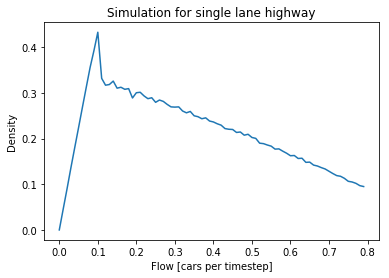

In [33]:
import matplotlib.pyplot as plt 

plt.plot(densities, flow_rates)
plt.xlabel("Flow [cars per timestep]")
plt.ylabel("Density")
plt.title("Simulation for single lane highway")
plt.savefig("sim.png",dpi = 300)
plt.show()

We can see that there is a critical density around 0.1 after which the flow of cars begins to decrease. The decrease in flow is indicative of traffic jams forming as cars are passing through the system more slowly on average. This is because when there are more cars on the road, there are less free spaces on the road so cars have to worry about colliding into other cars when deciding how to move forward, this results in many decelerations because of lack of space. This, coupled with random slow-downs which have a ripple or shochwave effect due to the small spaces between the cars, mean that the system tends to a slower state with more cars. We observe that at density of 0.8, the cars are flowly at a rate of 0.1 cars per timestep. This is extremely slow. 

# Multi-Lane Highways

## Description

Riekert et. al. improve upon the single-lane highway simulation by creating a double-lane highway model which allows for lane changes. This means, that if a car has a slower car in front of it, provided it meets some criteria described below, it can change into the other lane to avoid slowing down. In principle, this should mean that there are fewer traffic jams for highways with the same density of cars because there are more options for motion.

The most important thing to understand about this model, is that movement happens in 2 distinct steps. In a sub-timestep, the model checks if the car can move lanes, if it can, the car will move horizontally into the next lane. Next, in the actual timestep, the cars are moved forward according to the rules of the previous model.

In order to meet the criteria for a lane change:

1) The car must _look forward_: and check whether there is a car in front of it. If the distance between itself and the car in front of it is less than some value, $l$, then the car should consider a lane-change. In this simulation, I define $l$, to be the current velocity of the car + 1. I choose this to avoid cars having to slow down

2) The car must _look sideways and look forward_ at the car in the position in front of it in the next lane, to see if it would be able to move forward in the next lane. If the distance between the current car and the car ahead of it in the next lane is greater than $l_0$ then it should continuing considering a lane change and move onto the next step because it would be safe to move forward in the next lane. I define $l_0$ in the same way as $l$ for the same reasons

3) The car must _look sideways and look back_ at the car in the position behind it, in the next lane to see if the car would collide with it should it move into the next lane. We compare the speed of the current car to $l_{0back}$ and see if it is lesser than $l_{0back}$. If it meets this criteria, it is safe for the car to change lanes. I define $l_{0back}$ to be: the speed of the car behind it in the next lane over minus the distance between the current car and this car. This is because we need to consider the speed of the car behind it, because it will move forward this many places, and we need to consider the gap we have, because if the car were to move over, it would move over into this gap. If this metric is less than the speed of our car, our car would not collide with the car behind it because we are ensuring the gap is big enough given both car's movements 

4) There is a probability of changing lanes, provided the car can change lanes. In this assignment, I choose this probability to be 1 because I want to analyse the effects of changing lanes in comparison to a single lane where you cannot. Later experimentation could change this value.

## Double Lane Similation 

In [34]:
class TrafficSimulation2Lane():
    
    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5, p_change = 1):

        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        self.p_change = p_change
        self.flow = 0

        indices_left = np.random.choice(range(self.length),size = int(self.length*self.car_density), replace = False)
        indices_right = np.random.choice(range(self.length),size = int(self.length*self.car_density), replace = False)
        
        self.left = -np.ones(self.length, dtype=int)
        self.left[indices_left] = np.random.randint(
            0, self.max_speed + 1, size=len(indices_left))
        
        self.right = -np.ones(self.length, dtype=int)
        self.right[indices_right] = np.random.randint(
            0, self.max_speed + 1, size=len(indices_right))
        
        
    def step(self, display = True):
        ###
        #Check for lane changes
        #Horizontal car movements
        ###
        
        #for all cars in left lane 
        for i in range(self.length):
            l = self.left[i] + 1
            l_0 = l
            if self.left[i] != -1:
                gap = 1  
                #gap(i) is the distance between this car and 
                #the car in front of it in the same lane
                while self.left[(i + gap) % self.length] == -1:
                    gap += 1
                    
                #if gap is smaller than cars velocity
                #then we want to consider changing lanes 
                if gap < self.left[i]:
                    #so now we look forward in the left lane
                    #to see if there is space to move over 
                    
                    #gap_0(i) is the forward gap between the current
                    #car and the car in the next lane
                    gap_0 = 0
                    while self.right[(i + gap_0) % self.length] == -1:
                        gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                    if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                        gap_0_back = -1 
                        while self.right[(i + gap_0_back) % self.length] == -1:
                            gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                        if self.right[i+gap_0_back] - abs(gap_0_back) < self.left[i]:
                            self.right[i] = self.left[i]
                            self.left[i] = -1
        
        #For cars in the right lane 
        for i in range(self.length):
            l = self.right[i] + 1
            l_0 = l
            if self.right[i] != -1:
                gap = 1  
                #gap(i) is the distance between this car and 
                #the car in front of it in the same lane
                while self.right[(i + gap) % self.length] == -1:
                    gap += 1
                    
                #if gap is smaller than cars velocity
                #then we want to consider changing lanes 
                if gap < self.right[i]:
                    #so now we look forward in the right lane
                    #to see if there is space to move over 
                    
                    #gap_0(i) is the forward gap between the current
                    #car and the car in the next lane
                    gap_0 = 0
                    while self.left[(i + gap_0) % self.length] == -1:
                        gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                    if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                        gap_0_back = -1 
                        while self.left[(i + gap_0_back) % self.length] == -1:
                            gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                        if self.left[i+gap_0_back] - abs(gap_0_back) < self.right[i]:
                            self.left[i] = self.right[i]
                            self.right[i] = -1

        
        #Update forward movements of cars according
        #to the normal rules 
        # Update car velocities.
        
        #Update left lane
        for i in range(self.length):
            if self.left[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.left[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.left[i] < self.max_speed:
                    self.left[i] += 1
                # Deceleration
                if self.left[i] >= distance:
                    self.left[i] = distance - 1
                # Randomization
                if (self.left[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.left[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.left[i] + i >= self.length:
                    self.flow += 1
                    
        #Update right lane 
        for i in range(self.length):
            if self.right[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.right[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.right[i] < self.max_speed:
                    self.right[i] += 1
                # Deceleration
                if self.right[i] >= distance:
                    self.right[i] = distance - 1
                # Randomization
                if (self.right[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.right[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.right[i] + i >= self.length:
                    self.flow += 1
        #Display if true             
        if display:
            self.display()
            
        #Move cars with new velocities
        #Move left lane 
        new_state_left = -np.ones(self.length, dtype=int)
        #% is for periodic boundaries 
        for i in range(self.length):
            if self.left[i] != -1:
                new_state_left[(i + self.left[i]) % self.length] = self.left[i] 
        #update left lane with new states 
        self.left = new_state_left
        
        #Move right lane 
        new_state_right = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.right[i] != -1:
                new_state_right[(i + self.right[i]) % self.length] = self.right[i]
        self.right = new_state_right
     
    #display simulation
    #print number of cars in each lane so we can tell when a lane change has occurred 
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.left))
        print(''.join('.' if x == -1 else str(x) for x in self.right))
        print("There are",self.length - np.count_nonzero(self.left ==-1),"cars in the left lane")
        print("There are",self.length - np.count_nonzero(self.right ==-1),"cars in the right lane")
        print('')

## Simulating Different States 

We will now simulate the model with different densities as we did before to analyse their behaviour.

In [35]:
#Low density 
sim2 = TrafficSimulation2Lane(
    length=100, car_density=0.1, slow_down_prob=0.1)

In [36]:
for i in range(10):
    sim2.step()

..............0...4.............5...........03.........2..........4........3...5....................
.....0..............3..............................2..4...........03...05........1........2.......2.
There are 9 cars in the left lane
There are 11 cars in the right lane

..............0.......5..............5......1...4........3............5.......4.....5...............
3....1.................4.............................3....5.......1...01.....4....2.........2.......
There are 9 cars in the left lane
There are 11 cars in the right lane

..............1............5.................1......4.......2..5...........5......5......5..........
...2..2....................5..............5.............4..........2..1.2........2..3.........3.....
There are 9 cars in the left lane
There are 11 cars in the right lane

...............2................4.............1.........5.....3.....5...........5......5......5.....
.....2..2.......................5..............5............5........1.2..3.....

In [37]:
#Medium density 
sim2 = TrafficSimulation2Lane(
    length=100, car_density=0.3, slow_down_prob=0.1)

for i in range(10):
    sim2.step()

..3.....5.....01.1.3...3...1.1.1.1.1...3....2..1.005.....2...2.......02.......0.4.......1......2..02
..0.2..4....2..2..0004....2..1..1.1.0.0.5.......1.3.....2..5.....1.1.2...2....02..2..3........0.01.2
There are 28 cars in the left lane
There are 32 cars in the right lane

.3...3.......01.1.2...3...1.0.1.0.1.2.....3...0.000.....2..3...3.....1..3.....1.....4....2.......01.
.01...3....2..2..0001....2..1.2..1.01.1......3...2...4....3.....0.0.2..3...2..1..2..3...4.....1.0.2.
There are 28 cars in the left lane
There are 32 cars in the right lane

3...3...4....0.1.1..3....1.01..01..2..3......01.001.......3...3...2...1....3...2........2..04....1.0
.1.2.....3...2..0001.2.....1.2..0.01.1.2........2..3.....3...2..1.1...3...2..1.2...3...4.......01...
There are 30 cars in the left lane
There are 30 cars in the right lane

...3...4....01..1.2....2..01.1.1.2...3...3...1.001.2.........3...2..2..1......2..3........01....1.01
..2..3......2..0001.2..3....2..01.1.1.2..3........3...4.....2..1.1.2.....1..1

In [38]:
#High density 
sim2 = TrafficSimulation2Lane(
    length=100, car_density=0.6, slow_down_prob=0.1)

for i in range(10):
    sim2.step()

.1.3...0001.02..0001.000002..03...2..1.000.02..1.1.000001.000000.001.0004....1.1.1.01..01.3...1.000.
.001.2..0...1.1.03...01.03...001.2..02...0002..01.000000001.00001..0000001.001.1.01...1.1.2..001..01
There are 60 cars in the left lane
There are 60 cars in the right lane

..2...0001.01..0001.000001..01...2..1.0001.1..1.1.000001.0000001.01.0001....1.1.1.01.1.1.2...1.0001.
001.2..00....1.01...01.01...001.2..01..1.001..01.000000001.00000.1.000001.001.1.01.2...1.2..001.1.0.
There are 60 cars in the left lane
There are 60 cars in the right lane

....1.001.01.1.001.000001.1.1.2....1.0001.1.2..1.000001.0000001.01.0001.2....1.1.01.1.1.2..2..0001.1
00.2..001.....01.2..1.01.2..01.2..00.2..001.1.1.000000001.000001..000001.001.1.01.2..2..2..001.1.01.
There are 60 cars in the left lane
There are 60 cars in the right lane

2....001.01.1.001.000000.1.0.2..02..0001.1.2..1.000001.0000001.00.0001.2..3...1.01.1.0.2..2..0001.1.
01...001.2....1.2..1.01.2..01.2...01...001.1.1.000000000.000000.1.00001.001.1

We can see similar behaviour to the single lane model in that traffic jams tend to form with higher densities. One would expect these to be slightly fewer because of lane changes, but we need to run more models to be able to determine this larger scale behaviour. We do this below.

## Comparison to Single Lane Model 

In [39]:
flow_rates2 = []
densities2 = []

#get a range of densities 
#thats why we divide j by 100
for j in range(80):
        model = TrafficSimulation2Lane(length = 100, car_density = j/100, slow_down_prob=0.5)
        densities2.append(j/100)
        
        #for each model, average 20 times 
        for k in range(20):
            temp_rates2 = []
            #for each model, get the flow rate over 100 steps
            for i in range(100):
                model.step(display = False)
            temp_rates2.append(model.flow/200) #divide by 200 because of 2 lanes 
        flow_rates2.append(sum(temp_rates2)/20)

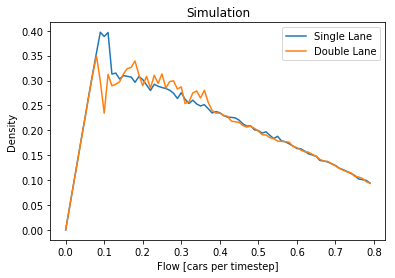

In [26]:
#Plotting
plt.plot(densities, flow_rates)
plt.plot(densities, flow_rates2)
plt.legend(("Single Lane", "Double Lane"))
plt.xlabel("Flow [cars per timestep]")
plt.ylabel("Density")
plt.title("Simulation")
plt.savefig("sim.png",dpi = 300)
plt.show()

The graph above allows us to compare to the single lane mode. We see that for densities above 0.2 the double lane model performs slightly better than the single lane model, but in general, they perform very similarly. This is expected since I expected a marginal increase in flow for some densities, but for higher densities, no amount of lane changing can stop traffic jams... 

We actually see that there is a point in the graph from about 0.08 to 0.1 where the double lane model performs slightly worse. This could be because of random slow downs, or because changing lanes makes one lane more densely populated than another which could cause a worse jam than in a single lane of the same overall system density.

In general, this graph leads us to conclude that the double lane model does not allow for significantly better flow rate in comparison to the single lane model for the lane densities.

However, if we were to use the _same number of cars_ instead of the same car densities, the double lane would far outperform the single lane as there is more space for movement resulting in fewer slow-downs and traffic jams. I graph this below: 

In [24]:
flow_rates22 = []
densities22 = []

#get a range of densities 
#thats why we divide j by 100
for j in range(80):
        model = TrafficSimulation2Lane(length = 100, car_density = j/100, slow_down_prob=0.5)
        densities22.append(j/100)
        
        #for each model, average 20 times 
        for k in range(20):
            temp_rates2 = []
            #for each model, get the flow rate over 100 steps
            for i in range(100):
                model.step(display = False)
            temp_rates2.append(model.flow/100) 
        flow_rates22.append(sum(temp_rates2)/20)

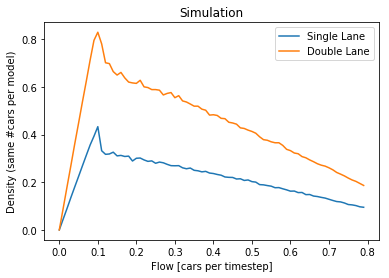

In [40]:
#Plotting
plt.plot(densities, flow_rates)
plt.plot(densities, flow_rates22)
plt.legend(("Single Lane", "Double Lane"))
plt.xlabel("Flow [cars per timestep]")
plt.ylabel("Density (same #cars per model)")
plt.title("Simulation")
plt.savefig("sim.png",dpi = 300)
plt.show()

# Key Questions 

## Triple Lane Simulation

We saw that there was not much of a difference between the single lane and double lane traffic simulation, but what about introducing a third lane? Below, I create a model for a 3-lane highway. Cars in the left lane can switch to the middle lane, cars in the right lane can switch to the middle, and cars in the middle lane first see if they can switch into the left lane, and then into the right. The middle lane car users prefer switching into the left lane because this follows general rules of traffic in Germany where the left lane is the "fast lane." 

In [41]:
class TrafficSimulation3Lane():
    
    def __init__(self, length=100, car_density=0.2, slow_down_prob=0.5, max_speed=5, p_change = 1):

        self.length = length
        self.car_density = car_density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        self.p_change = p_change
        self.flow = 0

        #randomly place cars in each lane
        indices_left = np.random.choice(range(self.length),size = int(self.length*self.car_density), replace = False)
        indices_middle = np.random.choice(range(self.length),size = int(self.length*self.car_density), replace = False)
        indices_right = np.random.choice(range(self.length),size = int(self.length*self.car_density), replace = False)
        
        self.left = -np.ones(self.length, dtype=int)
        self.left[indices_left] = np.random.randint(
            0, self.max_speed + 1, size=len(indices_left))
        
        self.middle = -np.ones(self.length, dtype=int)
        self.middle[indices_middle] = np.random.randint(
            0, self.max_speed + 1, size=len(indices_middle))
        
        self.right = -np.ones(self.length, dtype=int)
        self.right[indices_right] = np.random.randint(
            0, self.max_speed + 1, size=len(indices_right))
           
    def step(self, display = True):
        ###
        #Check for lane changes
        #Horizontal car movements
        ###
        
        #for all cars in left lane 
        #possible move to the middle
        for i in range(self.length):
            l = self.left[i] + 1
            l_0 = l
            if self.left[i] != -1:
                gap = 1  
                #gap(i) is the distance between this car and 
                #the car in front of it in the same lane
                while self.left[(i + gap) % self.length] == -1:
                    gap += 1
                    
                #if gap is smaller than cars velocity
                #then we want to consider changing lanes 
                if gap < self.left[i]:
                    #so now we look forward in the left lane
                    #to see if there is space to move over 
                    
                    #gap_0(i) is the forward gap between the current
                    #car and the car in the next lane
                    gap_0 = 0
                    while self.middle[(i + gap_0) % self.length] == -1:
                        gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                    if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                        gap_0_back = -1 
                        while self.middle[(i + gap_0_back) % self.length] == -1:
                            gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                        if self.middle[i+gap_0_back] - abs(gap_0_back) < self.left[i]:
                            self.middle[i] = self.left[i]
                            self.left[i] = -1
        
        #For cars in the right lane 
        #possible move to the middle 
        for i in range(self.length):
            l = self.right[i] + 1
            l_0 = l
            if self.right[i] != -1:
                gap = 1  
                #gap(i) is the distance between this car and 
                #the car in front of it in the same lane
                while self.right[(i + gap) % self.length] == -1:
                    gap += 1
                    
                #if gap is smaller than cars velocity
                #then we want to consider changing lanes 
                if gap < self.right[i]:
                    #so now we look forward in the right lane
                    #to see if there is space to move over 
                    
                    #gap_0(i) is the forward gap between the current
                    #car and the car in the next lane
                    gap_0 = 0
                    while self.middle[(i + gap_0) % self.length] == -1:
                        gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                    if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                        gap_0_back = -1 
                        while self.middle[(i + gap_0_back) % self.length] == -1:
                            gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                        #add a check to see if a car from the left lane moved over already
                        if self.middle[i+gap_0_back] - abs(gap_0_back) < self.right[i] and self.middle[i] != -1:
                            self.middle[i] = self.right[i]
                            self.right[i] = -1
                            
        #For cars in the middle lane
        #possible move to the left or the right 
        for i in range(self.length):
            l = self.middle[i] + 1
            l_0 = l
            
            
            if self.middle[i] != -1:
                gap = 1  
                #gap(i) is the distance between this car and 
                #the car in front of it in the same lane
                
                while self.left[(i + gap) % self.length] == -1:
                    gap += 1
                 
                #first check if we can move into left lane,
                #because that is the fast lane 
                #if gap is smaller than cars velocity
                #then we want to consider changing lanes 
                if gap < self.middle[i]:
                    #so now we look forward in the left lane
                    #to see if there is space to move over 
                    
                    #gap_0(i) is the forward gap between the current
                    #car and the car in the next lane
                    gap_0 = 0
                    while self.left[(i + gap_0) % self.length] == -1:
                        gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                    if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                        gap_0_back = -1 
                        while self.left[(i + gap_0_back) % self.length] == -1:
                            gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                        if self.left[i+gap_0_back] - abs(gap_0_back) < self.middle[i]:
                            self.left[i] = self.middle[i]
                            self.middle[i] = -1
                            
                #next, check if we can move into the right lane 
                else:
                    gap = 1  
                    #gap(i) is the distance between this car and 
                    #the car in front of it in the same lane
                
                    while self.right[(i + gap) % self.length] == -1:
                        gap += 1
                    
                    if gap < self.middle[i]:
                    #so now we look forward in the other lane
                    #to see if there is space to move over 
                        gap_0 = 0
                        while self.right[(i + gap_0) % self.length] == -1:
                            gap_0 += 1
                        
                    #if there is enough space in front to the right
                    #we want to check to the back to the right 
                        if gap_0 >= l_0:
                        
                        #gap_0_back(i) is the backward gap with the
                        #current car and the car behind it in the other 
                        #lane 
                            gap_0_back = -1 
                            while self.right[(i + gap_0_back) % self.length] == -1:
                                gap_0_back -= 1
                        
                        #if the behind gap is big enough 
                        #then we can change lanes 
                            if self.right[i+gap_0_back] - abs(gap_0_back) < self.middle[i]:
                                self.right[i] = self.middle[i]
                                self.middle[i] = -1
                    
        #Update forward movements of cars according
        #to the normal rules 
        # Update car velocities.
        
        #Update left lane
        for i in range(self.length):
            if self.left[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.left[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.left[i] < self.max_speed:
                    self.left[i] += 1
                # Deceleration
                if self.left[i] >= distance:
                    self.left[i] = distance - 1
                # Randomization
                if (self.left[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.left[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.left[i] + i >= self.length:
                    self.flow += 1
                    
        #Update right lane 
        for i in range(self.length):
            if self.right[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.right[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.right[i] < self.max_speed:
                    self.right[i] += 1
                # Deceleration
                if self.right[i] >= distance:
                    self.right[i] = distance - 1
                # Randomization
                if (self.right[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.right[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.right[i] + i >= self.length:
                    self.flow += 1
                    
        
        #Update middle lane 
        for i in range(self.length):
            if self.middle[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.middle[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.middle[i] < self.max_speed:
                    self.middle[i] += 1
                # Deceleration
                if self.middle[i] >= distance:
                    self.middle[i] = distance - 1
                # Randomization
                if (self.middle[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.middle[i] -= 1
                    
                #count the flow of cars
                #if the car is leaving the 'end' point of the road, count it
                if self.middle[i] + i >= self.length:
                    self.flow += 1
                    
        if display:
            self.display()
            
        # Move cars forward using their new velocities
        new_state_left = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.left[i] != -1:
                new_state_left[(i + self.left[i]) % self.length] = self.left[i]
        self.left = new_state_left
        
        new_state_right = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.right[i] != -1:
                new_state_right[(i + self.right[i]) % self.length] = self.right[i]
        self.right = new_state_right
        
        new_state_middle = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.middle[i] != -1:
                new_state_middle[(i + self.middle[i]) % self.length] = self.middle[i]
        self.middle = new_state_middle
        
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.left))
        print(''.join('.' if x == -1 else str(x) for x in self.middle))
        print(''.join('.' if x == -1 else str(x) for x in self.right))
        print("There are",self.length - np.count_nonzero(self.left ==-1),"cars in the left lane")
        print("There are",self.length - np.count_nonzero(self.middle ==-1),"cars in the middle lane")
        print("There are",self.length - np.count_nonzero(self.right ==-1),"cars in the right lane")
        print('')

In [42]:
#simulate
sim3 = TrafficSimulation3Lane(
    length=100, car_density=0.2, slow_down_prob=0.1)

In [43]:
for i in range(5):
    sim3.step()

.....2......3......3...2...2......5.......2......005.......5..........2..02...04.....4...........3..
.........2..2..01....5......1.....1....03...4.......1.........02....3...2..03...0005..........5.....
1......1.3...3.............5......0.3......1.01.1.02.......03...01.....4..................4........0
There are 18 cars in the left lane
There are 22 cars in the middle lane
There are 20 cars in the right lane

4......3.......4......2..3...3.........3....3....00.....5.......5.......01..1.1....5.....5..........
...........2..01.2........2..2.....2...1...4....4....2........1..3.....2..01...0001.....5..........5
.2......2...2...4...............1.1....4....01.1.01..3.....1...01.2........4..................4....1
There are 18 cars in the left lane
There are 22 cars in the middle lane
There are 20 cars in the right lane

....5.....4........4....3...3...4.........4....1.01..........5.......2..1.2..0.2........5.....5.....
....5........01.2..3........2..3.....2..2......3....1..3.......2....4....01

In [44]:
flow_rates3 = []
densities3 = []

#get a range of densities 
#thats why we divide j by 100
for j in range(80):
        model = TrafficSimulation3Lane(length = 100, car_density = j/100, slow_down_prob=0.5)
        densities3.append(j/100)
        
        #for each model, average 20 times 
        for k in range(20):
            temp_rates3 = []
            #for each model, get the flow rate over 100 steps
            for i in range(100):
                model.step(display = False)
            temp_rates3.append(model.flow/300) #divide by 300 because of 3 lanes 
        flow_rates3.append(sum(temp_rates3)/20)

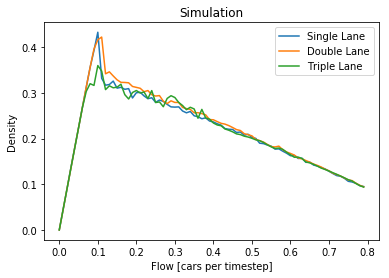

In [45]:
#divide flow rates 2 by 2 
plt.plot(densities, flow_rates)
plt.plot(densities, flow_rates2)
plt.plot(densities, flow_rates3)
plt.legend(("Single Lane", "Double Lane", "Triple Lane"))
plt.xlabel("Flow [cars per timestep]")
plt.ylabel("Density")
plt.title("Simulation")
plt.savefig("sim.png",dpi = 300)
plt.show()

## Discussion of Different Lanes

The graph above shows that the single, double, and triple lane traffic do not have significantly different flow rates with the same car densities. This leads us to believe that introducing more lanes of cars, does not decrease traffic given we have the same car densities. This is consistent with what we discussed in class, that urban planners have found that introducing more lanes, just introduces more cars, so roads are generally as densely populated and traffic does not improve. However, as we discussed in the double lane simulation, if the amount of cars stayed the same, flow rate would improve with more lanes.

## Applicability to Berlin 

This model is applicable to Berlin in that I have witnessed that traffic jams can occur without any sort of obstacle, like a car crash, in the way. There is a lot of human error in driving around the area that we live. We live near a pre-school, so many mothers are driving with their children and can get distracted by them and unintentionally slow down, causing a ripple-effect that we see happen in our model when cars randomly slow down.

In Germany, there is a concept of "autobahns" which are highways without a speed limit. We could adjust our model to have $v_max$ as the maximum speed a car could travel, as opposed to the speed limit to make it more realistic.

However, where the model differs is that Berlin has many traffic lights, intersections, and cars moving in different directions. Our model does not account for cars moving in the other direction moving through our lane to make a turn. We could introduce cars moving in the opposite direction and write rules for them being able to turn if there is enough space in further research. I would assume these 'complications' would only make our traffic jams more frequent and intense.

# HCs 

**#organization:** I used various headings and subheadings in this assignment to make my discussion clear. Furthermore, I used extensive comments in my code to indicate what I was doing. Especially in the 3 lane model, it was important to organise my code to show when I was working on the right, left, and middle lanes so the code could be understood by the grader

**#heuristics:** Throughout this assignment I used the heuristic of "successive approximation" to reach my end goal. I would incrementally debug my code by printing various statements to check it was working properly, and would get little bits working incrementally until I had fully working code. This approximation can also be seen in my progression from a single to a triple lane code.

**#deduction:** To complete this assignment, I had to understand how the rules of the systems logically followed from one another. For example, the lane change rules avoid collisions because they look ahead, look ahead to the side, and look back. It was important to understand that these "premises" led to "conclusion" that collisions do not occur. I thought this was a non-traditional application of deduction and was interesting.

**#strategize:** When you have the task of writing classes that will be over 100 lines of code, you really have to have a good strategy in place. I acknowledged that my weakness is getting overwhelmed by classes and many lines of code, so I mitigated this by writing pseudocode on paper to grasp what I needed to do before starting. I also played on my strengths of really understanding the theory behind the rules from class and wrote these down again to be able to understand how to translate them into code.

# References

Nagel, K., Schreckenberg, M. (1992). A cellular automaton model for freeway traffic. Journal de Physique I, 2(12), 2221–2229. Retrieved from https://course-resources.minerva.kgi.edu/uploaded_files/mke/YpqvNV/nagel-schreckenberg.pdf

Rickert, M., et al. (1996). Two lane traffic simulations using cellular automata. Physica A: Statistical Mechanics and its Applications, 231(4), 534–550. Retrieved from https://course-resources.minerva.kgi.edu/uploaded_files/mke/00100888-7879/rickert-et-al.pdf